In [2]:
# import
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [95]:
iris = sns.load_dataset('iris')
titanic = sns.load_dataset('titanic')
mpg = sns.load_dataset('mpg')

# Iris

## a. 각 종들에 대한 특징들의 평균, 표준편차

In [4]:
setosa = iris[iris["species"]=="setosa"]
versicolor =iris[iris["species"]=="versicolor"]
virginica = iris[iris["species"]=="virginica"]

In [144]:
for species in iris.species.unique():
    print(species, '=================================================')
    print(iris[iris.species == species].describe())
    print()

setosa =================================================
       sepal_length  sepal_width  petal_length  petal_width
count      50.00000    50.000000     50.000000    50.000000
mean        5.00600     3.428000      1.462000     0.246000
std         0.35249     0.379064      0.173664     0.105386
min         4.30000     2.300000      1.000000     0.100000
25%         4.80000     3.200000      1.400000     0.200000
50%         5.00000     3.400000      1.500000     0.200000
75%         5.20000     3.675000      1.575000     0.300000
max         5.80000     4.400000      1.900000     0.600000

versicolor =================================================
       sepal_length  sepal_width  petal_length  petal_width
count     50.000000    50.000000     50.000000    50.000000
mean       5.936000     2.770000      4.260000     1.326000
std        0.516171     0.313798      0.469911     0.197753
min        4.900000     2.000000      3.000000     1.000000
25%        5.600000     2.525000      4.0

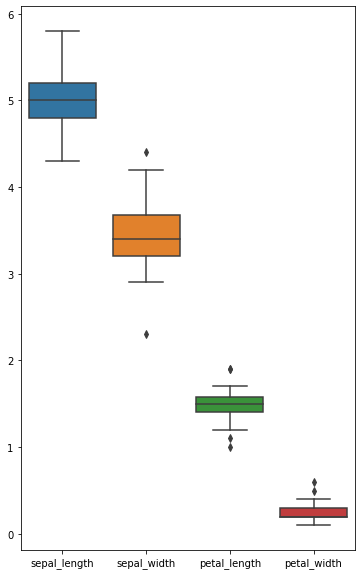

In [38]:
plt.figure(figsize=(6,10))
sns.boxplot(data=iris[iris["species"]=="setosa"])
plt.show()

## b. 이상치 제거

In [ ]:
s = iris[iris.species == 'setosa']['sepal_width']
q1 = s.quantile(0.25) # pandas 활용
q3 = np.percentile(s.values, 75) # numpy 활용
iqr = q3 - q1

lower_limit = q1 - 1.5 * iqr
upper_limit = q3 + 1.5 * iqr

s[s < lower_limit] = np.nan
s[s > upper_limit] = np.nan

In [10]:
s.isna().sum()

2

In [11]:
s.mean(), s.std()

(3.43125, 0.32034306743094004)

In [12]:
def get_new_stat(s):
    s = iris[iris.species == 'setosa']['sepal_width']
    q1 = s.quantile(0.25)
    q3 = s.quantile(0.75)
    iqr = q3 - q1

    lower_limit = q1 - 1.5 * iqr
    upper_limit = q3 + 1.5 * iqr

    s[s < lower_limit] = np.nan
    s[s > upper_limit] = np.nan
    return s.mean(), s.std()

In [32]:
# code refactoring
def get_new_stat(s):
    s = iris[iris.species == 'setosa']['sepal_width']
    q1, q3 = s.quantile(0.25), s.quantile(0.75)
    iqr = q3 - q1

    lower_limit = q1 - 1.5 * iqr
    upper_limit = q3 + 1.5 * iqr

    s[(s < lower_limit) | (s > upper_limit)] = np.nan

    return s.isna().sum(), s.mean(), s.std()

12가지 항목

In [33]:
for species in iris.species.unique():
    for feature in iris.columns[:-1]:
        s = iris[iris.species == species][feature]
        _, new_mean, new_std = get_new_stat(s)
        print(species, feature, ':',new_mean, new_std)

setosa sepal_length : 3.43125 0.32034306743094004
setosa sepal_width : 3.43125 0.32034306743094004
setosa petal_length : 3.43125 0.32034306743094004
setosa petal_width : 3.43125 0.32034306743094004
versicolor sepal_length : 3.43125 0.32034306743094004
versicolor sepal_width : 3.43125 0.32034306743094004
versicolor petal_length : 3.43125 0.32034306743094004
versicolor petal_width : 3.43125 0.32034306743094004
virginica sepal_length : 3.43125 0.32034306743094004
virginica sepal_width : 3.43125 0.32034306743094004
virginica petal_length : 3.43125 0.32034306743094004
virginica petal_width : 3.43125 0.32034306743094004


/usr/local/lib/python3.8/dist-packages/pandas/core/generic.py:8870: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [34]:
# 결과를 데이터 프레임으로 변경
line = []
for species in iris.species.unique():
    for feature in iris.columns[:-1]:
        s = iris[iris.species == species][feature]
        outlier, new_mean, new_std = get_new_stat(s)
        d = {'species':species, 'feature':feature, 'outlier개수':outlier, 'mean':new_mean, 'std':new_std}
        line.append(d)

In [35]:
df = pd.DataFrame(line)

In [41]:
# 인덱스 변경
df.set_index(['species', 'feature'], inplace=True)
df

outlier개수     mean       std
species    feature                                   
setosa     sepal_length          2  3.43125  0.320343
           sepal_width           2  3.43125  0.320343
           petal_length          2  3.43125  0.320343
           petal_width           2  3.43125  0.320343
versicolor sepal_length          2  3.43125  0.320343
           sepal_width           2  3.43125  0.320343
           petal_length          2  3.43125  0.320343
           petal_width           2  3.43125  0.320343
virginica  sepal_length          2  3.43125  0.320343
           sepal_width           2  3.43125  0.320343
           petal_length          2  3.43125  0.320343
           petal_width           2  3.43125  0.320343

In [45]:
df.loc['versicolor']

,outlier개수,mean,std
feature,,,
sepal_length,2,3.43125,0.320343
sepal_width,2,3.43125,0.320343
petal_length,2,3.43125,0.320343
petal_width,2,3.43125,0.320343


In [51]:
df.loc[[('setosa', 'sepal_width')]] # setosa의 sepal_width를 데이터프레임으로 추출

,,outlier개수,mean,std
species,feature,,,
setosa,sepal_width,2,3.43125,0.320343


# Titanic

## a. category 1열 추가

In [53]:
titanic['category1'] = titanic.apply(lambda x : x.sex if x.age>=20 else 'child', axis=1)

In [54]:
titanic.tail()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,category1
886,0,2,male,27.0,0,0,13.00,S,Second,man,True,NaN,Southampton,no,True,male
887,1,1,female,19.0,0,0,30.00,S,First,woman,False,B,Southampton,yes,True,child
888,0,3,female,NaN,1,2,23.45,S,Third,woman,False,NaN,Southampton,no,False,child
889,1,1,male,26.0,0,0,30.00,C,First,man,True,C,Cherbourg,yes,True,male
890,0,3,male,32.0,0,0,7.75,Q,Third,man,True,NaN,Queenstown,no,True,male


## b. 평균나이 대체

In [55]:
titanic.age.fillna(titanic.age.mean(), inplace=True)

In [56]:
titanic.tail() 

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,category1
886,0,2,male,27.000000,0,0,13.00,S,Second,man,True,NaN,Southampton,no,True,male
887,1,1,female,19.000000,0,0,30.00,S,First,woman,False,B,Southampton,yes,True,child
888,0,3,female,29.699118,1,2,23.45,S,Third,woman,False,NaN,Southampton,no,False,child
889,1,1,male,26.000000,0,0,30.00,C,First,man,True,C,Cherbourg,yes,True,male
890,0,3,male,32.000000,0,0,7.75,Q,Third,man,True,NaN,Queenstown,no,True,male


In [57]:
titanic['category1'] = titanic.apply(lambda x : x.sex if x.age>=20 else 'child', axis=1) #변동된 888번의 category1 값 조정
titanic.tail()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,category1
886,0,2,male,27.000000,0,0,13.00,S,Second,man,True,NaN,Southampton,no,True,male
887,1,1,female,19.000000,0,0,30.00,S,First,woman,False,B,Southampton,yes,True,child
888,0,3,female,29.699118,1,2,23.45,S,Third,woman,False,NaN,Southampton,no,False,female
889,1,1,male,26.000000,0,0,30.00,C,First,man,True,C,Cherbourg,yes,True,male
890,0,3,male,32.000000,0,0,7.75,Q,Third,man,True,NaN,Queenstown,no,True,male


## c. 성별 생존율, 선실별 생존율, 출발지별 생존율

* 성별 생존율

In [59]:
titanic.groupby('sex')[['survived']].mean()

,survived
sex,
female,0.742038
male,0.188908


In [71]:
titanic.pivot_table(values='survived', index='sex', aggfunc='mean')

,survived
sex,
female,0.742038
male,0.188908


* 선실별 생존율

In [60]:
titanic.groupby('class')[['survived']].mean()

,survived
class,
First,0.629630
Second,0.472826
Third,0.242363


In [68]:
titanic.pivot_table(values='survived', index='class', aggfunc='mean')

,survived
class,
First,0.629630
Second,0.472826
Third,0.242363


* 출발지별 생존율

In [69]:
titanic.groupby('embark_town')[['survived']].mean()

,survived
embark_town,
Cherbourg,0.553571
Queenstown,0.389610
Southampton,0.336957


In [70]:
titanic.pivot_table(values='survived', index='embark_town', aggfunc='mean')

,survived
embark_town,
Cherbourg,0.553571
Queenstown,0.389610
Southampton,0.336957


* 성별, 선실별 생존율

In [73]:
titanic.pivot_table(values='survived', index=['sex', 'class'], aggfunc='mean')

survived
sex    class           
female First   0.968085
       Second  0.921053
       Third   0.500000
male   First   0.368852
       Second  0.157407
       Third   0.135447

## d. 승객의 나이로 그룹을 나누고, 그룹별 생존율 구하기

In [74]:
titanic['age_category'] = pd.cut(x=titanic['age'], # 데이터 배열
                      bins=[1, 20, 30, 50, 70, 100], # 경계값
                      labels=['미성년자', '청년', '중년', '장년', '노년'], # bin이름
                      include_lowest=True)

In [75]:
titanic.tail()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,category1,age_category
886,0,2,male,27.000000,0,0,13.00,S,Second,man,True,NaN,Southampton,no,True,male,청년
887,1,1,female,19.000000,0,0,30.00,S,First,woman,False,B,Southampton,yes,True,child,미성년자
888,0,3,female,29.699118,1,2,23.45,S,Third,woman,False,NaN,Southampton,no,False,female,청년
889,1,1,male,26.000000,0,0,30.00,C,First,man,True,C,Cherbourg,yes,True,male,청년
890,0,3,male,32.000000,0,0,7.75,Q,Third,man,True,NaN,Queenstown,no,True,male,중년


In [76]:
titanic.age_category.value_counts()

청년      407
중년      241
미성년자    172
장년       59
노년        5
Name: age_category, dtype: int64

In [79]:
titanic.groupby('age_category')[['survived']].mean()

,survived
age_category,
미성년자,0.436047
청년,0.334152
중년,0.423237
장년,0.355932
노년,0.200000


In [80]:
titanic.pivot_table(values='survived', index='age_category', aggfunc='mean')

,survived
age_category,
미성년자,0.436047
청년,0.334152
중년,0.423237
장년,0.355932
노년,0.200000


## e. 세 개의 나이 그룹

In [81]:
titanic['age_group'] = pd.qcut(titanic.age, 3)

In [84]:
titanic.age_group.value_counts()

(25.0, 31.0]     304
(0.419, 25.0]    301
(31.0, 80.0]     286
Name: age_group, dtype: int64

In [85]:
titanic.groupby('age_group')[['survived']].mean()

,survived
age_group,
"(0.419, 25.0]",0.411960
"(25.0, 31.0]",0.335526
"(31.0, 80.0]",0.405594


In [86]:
titanic.pivot_table(values='survived', index='age_group', aggfunc='mean')

,survived
age_group,
"(0.419, 25.0]",0.411960
"(25.0, 31.0]",0.335526
"(31.0, 80.0]",0.405594


# Mpg

## a. 배기량 대비 마력 column 추가

In [87]:
mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [96]:
mpg['hp_per_cc'] = mpg.horsepower / mpg.displacement

In [89]:
mpg.head(2)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,hp_per_cc
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu,0.423453
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320,0.471429


## b. manufacture와 model column을 추가

In [99]:
mpg['manufacture'] = mpg.name.apply(lambda x : x.split()[0])
mpg['model'] = mpg.name.apply(lambda x : " ".join(x.split()[1:]))

In [100]:
mpg.drop(columns='name', inplace=True)

In [101]:
mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,hp_per_cc,manufacture,model
0,18.0,8,307.0,130.0,3504,12.0,70,usa,0.423453,chevrolet,chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,0.471429,buick,skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,0.471698,plymouth,satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,0.493421,amc,rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,0.463576,ford,torino


## c. 엔진 실린더 개수별 연비

In [105]:
mpg.cylinders.unique()

array([8, 4, 6, 3, 5])

In [103]:
mpg.groupby('cylinders')[['mpg']].mean()

,mpg
cylinders,
3,20.550000
4,29.286765
5,27.366667
6,19.985714
8,14.963107


In [104]:
mpg.pivot_table(values='mpg', index='cylinders', aggfunc='mean')

,mpg
cylinders,
3,20.550000
4,29.286765
5,27.366667
6,19.985714
8,14.963107


## d. 생산지별 배기량 대비 마력의 평균

In [106]:
mpg.groupby('origin')[['hp_per_cc']].mean()

,hp_per_cc
origin,
europe,0.740005
japan,0.789485
usa,0.512063


In [107]:
mpg.pivot_table(values='hp_per_cc', index='origin', aggfunc='mean')

,hp_per_cc
origin,
europe,0.740005
japan,0.789485
usa,0.512063


## e. 모델의 개수가 5개 이상인 제조사 중 평균 연비가 top5인 제조사

In [120]:
s = mpg.manufacture.value_counts()
s[s >= 5].index

Index(['ford', 'chevrolet', 'plymouth', 'amc', 'dodge', 'toyota', 'datsun',
       'buick', 'pontiac', 'volkswagen', 'honda', 'mercury', 'mazda',
       'oldsmobile', 'fiat', 'peugeot', 'audi', 'chrysler', 'vw', 'volvo',
       'renault'],
      dtype='object')

In [124]:
big = s[s >= 5].index.tolist()
type(big)

list

In [128]:
big_mpg = mpg[mpg['manufacture'].isin(big)]

In [132]:
big_mpg.groupby('manufacture')[['mpg']].mean().sort_values(by='mpg', ascending=False)[:5]

,mpg
manufacture,
vw,39.016667
honda,33.761538
renault,32.880000
datsun,31.113043
mazda,30.860000


In [135]:
big_mpg.pivot_table(values='mpg', index='manufacture', aggfunc='mean').sort_values(by='mpg', ascending=False).head()

,mpg
manufacture,
vw,39.016667
honda,33.761538
renault,32.880000
datsun,31.113043
mazda,30.860000


* 참고

In [136]:
new_mpg = mpg.groupby('manufacture').filter(lambda x : x.manufacture.count() >= 5)

In [138]:
new_mpg.groupby('manufacture')[['mpg']].mean().sort_values(by='mpg', ascending=False)[:5]

,mpg
manufacture,
vw,39.016667
honda,33.761538
renault,32.880000
datsun,31.113043
mazda,30.860000


In [139]:
new_mpg.pivot_table(values='mpg', index='manufacture', aggfunc='mean').sort_values(by='mpg', ascending=False).head()

,mpg
manufacture,
vw,39.016667
honda,33.761538
renault,32.880000
datsun,31.113043
mazda,30.860000
